In [1]:
#let’s first import the libraries we will use

import pandas as pd 
import matplotlib as plt


In [2]:
#load our dataframe
df=pd.read_excel("candyhierarchy2017.xlsx")

In [3]:
#drop duplicates if any
df.drop_duplicates(inplace=True)

In [4]:
#let’s discover the data
print(df.columns)

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)


In [5]:
#let’s discover the data
print (df.head())

   Internal ID Q1: GOING OUT? Q2: GENDER Q3: AGE Q4: COUNTRY  \
0     90258773            NaN        NaN     NaN         NaN   
1     90272821             No       Male      44        USA    
2     90272829            NaN       Male      49         USA   
3     90272840             No       Male      40          us   
4     90272841             No       Male      23         usa   

  Q5: STATE, PROVINCE, COUNTY, ETC Q6 | 100 Grand Bar  \
0                              NaN                NaN   
1                               NM                MEH   
2                         Virginia                NaN   
3                               or                MEH   
4                         exton pa                JOY   

  Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)  \
0                                                NaN                                       
1                                            DESPAIR                                    

In [6]:
#let’s delete unnamed columns
df=df.drop(['Unnamed: 113'], axis=1)

In [7]:
df.info

<bound method DataFrame.info of       Internal ID Q1: GOING OUT? Q2: GENDER Q3: AGE Q4: COUNTRY  \
0        90258773            NaN        NaN     NaN         NaN   
1        90272821             No       Male      44        USA    
2        90272829            NaN       Male      49         USA   
3        90272840             No       Male      40          us   
4        90272841             No       Male      23         usa   
...           ...            ...        ...     ...         ...   
2455     90314359             No       Male      24         USA   
2456     90314580             No     Female      33         USA   
2457     90314634             No     Female      26        USA    
2458     90314658             No       Male      58         Usa   
2459     90314802             No     Female      66         usa   

     Q5: STATE, PROVINCE, COUNTY, ETC Q6 | 100 Grand Bar  \
0                                 NaN                NaN   
1                                  NM      

In [8]:
#let’s discover howmany null values each column Has
df.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 119, dtype: int64

In [9]:
#We have in our dataframe 2460 rows and to be accurate in our analysis
#We will drop columns with 70 percent or more of nulls
df.drop([ 'Q8: DESPAIR OTHER','Q9: OTHER COMMENTS','Q12: MEDIA [Yahoo]', 'Q12: MEDIA [Daily Dish]','Q12: MEDIA [ESPN]'], axis=1)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q10: DRESS,Q11: DAY,Q12: MEDIA [Science],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,White and gold,Sunday,1.0,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",White and gold,Sunday,1.0,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,JOY,JOY,DESPAIR,DESPAIR,JOY,NaN,White and gold,Friday,1.0,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,...,JOY,DESPAIR,MEH,DESPAIR,MEH,Mounds,White and gold,Friday,NaN,NaN
2456,90314580,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,...,NaN,JOY,DESPAIR,MEH,JOY,NaN,Blue and black,Friday,1.0,"(70, 26)"
2457,90314634,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,...,JOY,MEH,DESPAIR,DESPAIR,MEH,Tiny bottles of maple syrup as given out by Cr...,Blue and black,Friday,1.0,"(67, 35)"
2458,90314658,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#id wont be useful here so we will drop it
df=df.drop('internal_id', axis=1)


In [20]:
#In the survey this data collected by there is an option that says 
#you may not fill very field with your real data so others can’t recognize you 
#As we see in gender column there is 41 null value that are thought that "they’d rather not say"
#so i gonna fill gender null value with "I’d rather not say"
df['Q2: GENDER'].fillna(value="I'd rather not say", inplace=True)

In [67]:
#To make usa and USA the same 
df['q4_country'] = df['q4_country'].str.upper() 

In [68]:
print(df.head())

  q1_going_out?           q2_gender q3_age q4_country  \
0             0  I'd rather not say      0        NaN   
1            No                Male     44       USA    
2             0                Male     49        USA   
3            No                Male     40         US   
4            No                Male     23        USA   

  q5_state,_province,_county,_etc  q6__100_grand_bar  \
0                               0                  0   
1                              NM                  2   
2                        Virginia                  0   
3                              or                  2   
4                        exton pa                  3   

   q6__anonymous_brown_globs_that_come_in_black_and_orange_wrappers\t(a.k.a._mary_janes)  \
0                                                  0                                       
1                                                  1                                       
2                                           

In [23]:
df.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                     0
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 119, dtype: int64

In [26]:
df.dtypes

Internal ID                   int64
Q1: GOING OUT?               object
Q2: GENDER                   object
Q3: AGE                      object
Q4: COUNTRY                  object
                             ...   
Q12: MEDIA [Daily Dish]     float64
Q12: MEDIA [Science]        float64
Q12: MEDIA [ESPN]           float64
Q12: MEDIA [Yahoo]          float64
Click Coordinates (x, y)     object
Length: 119, dtype: object

In [69]:
df


,q1_going_out?,q2_gender,q3_age,q4_country,"q5_state,_province,_county,_etc",q6__100_grand_bar,q6__anonymous_brown_globs_that_come_in_black_and_orange_wrappers\t(a.k.a._mary_janes),q6__any_full-sized_candy_bar,q6__black_jacks,q6__bonkers_(the_candy),...,q7_joy_other,q8_despair_other,q9_other_comments,q10_dress,q11_day,q12_media_[daily_dish],q12_media_[science],q12_media_[espn],q12_media_[yahoo],"click_coordinates_(x,_y)"
0,0,I'd rather not say,0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
1,No,Male,44,USA,NM,2,1,3,2,1,...,Mounds,0,Bottom line is Twix is really the only candy w...,White and gold,Sunday,0.0,1.0,0.0,0.0,"(84, 25)"
2,0,Male,49,USA,Virginia,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0
3,No,Male,40,US,or,2,1,3,2,2,...,"Reese's crispy crunchy bars, 5th avenue bars, ...",0,Raisins can go to hell,White and gold,Sunday,0.0,1.0,0.0,0.0,"(75, 23)"
4,No,Male,23,USA,exton pa,3,1,3,1,2,...,0,0,0,White and gold,Friday,0.0,1.0,0.0,0.0,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,No,Male,24,USA,MD,3,1,2,1,1,...,Mounds,Fruit Stripe Gum,0,White and gold,Friday,0.0,0.0,0.0,0.0,0
2456,No,Female,33,USA,New York,2,1,3,0,0,...,0,Capers,0,Blue and black,Friday,0.0,1.0,0.0,0.0,"(70, 26)"
2457,No,Female,26,USA,Tennessee,2,1,3,1,2,...,Tiny bottles of maple syrup as given out by Cr...,0,0,Blue and black,Friday,0.0,1.0,0.0,0.0,"(67, 35)"
2458,No,Male,58,USA,North Carolina,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0


In [30]:
#fill nulls
for col in df:
    if type(df[col])=='object':
        df[colt]=df[col].fillna(value='unkown')
    else:
        df[col]=df[col].fillna(value=0)

In [31]:
df.isnull().sum().sum()

0

In [32]:
#Rename columns
df.columns=[x.lower() for x in df.columns.str.replace(" ", "_").str.replace("[|:]","")]

In [33]:
df.columns

Index(['internal_id', 'q1_going_out?', 'q2_gender', 'q3_age', 'q4_country',
       'q5_state,_province,_county,_etc', 'q6__100_grand_bar',
       'q6__anonymous_brown_globs_that_come_in_black_and_orange_wrappers\t(a.k.a._mary_janes)',
       'q6__any_full-sized_candy_bar', 'q6__black_jacks',
       ...
       'q7_joy_other', 'q8_despair_other', 'q9_other_comments', 'q10_dress',
       'q11_day', 'q12_media_[daily_dish]', 'q12_media_[science]',
       'q12_media_[espn]', 'q12_media_[yahoo]', 'click_coordinates_(x,_y)'],
      dtype='object', length=119)

In [40]:
df['q6__butterfinger'].value_counts()

JOY        1177
0           682
MEH         460
DESPAIR     141
Name: q6__butterfinger, dtype: int64

In [42]:
joy_map={
    "JOY": 3, "MEH":2,"DESPAIR":1}


In [46]:
df=df.applymap(lambda q: joy_map.get(q) if q in joy_map else q)

In [47]:
candy_only=df.iloc[: ,6:-10]

In [48]:
candy_only.describe()

,q6__100_grand_bar,q6__anonymous_brown_globs_that_come_in_black_and_orange_wrappers\t(a.k.a._mary_janes),q6__any_full-sized_candy_bar,q6__black_jacks,q6__bonkers_(the_candy),q6__bonkers_(the_board_game),q6__bottle_caps,q6__box'o'raisins,q6__broken_glow_stick,q6__butterfinger,...,q6__three_musketeers,q6__tolberone_something_or_other,q6__trail_mix,q6__twix,"q6__vials_of_pure_high_fructose_corn_syrup,_for_main-lining_into_your_vein",q6__vicodin,q6__whatchamacallit_bars,q6__white_bread,q6__whole_wheat_anything,q6__york_peppermint_patties
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,1.713008,1.032114,2.080488,0.936179,1.039431,1.038618,1.339431,1.008943,0.775203,1.866667,...,1.782927,1.928455,1.177236,1.984553,0.984959,1.352033,1.555285,0.810976,0.916260,1.781707
std,1.233823,0.878199,1.314366,0.886614,0.969057,1.006149,1.106669,0.814619,0.564176,1.275774,...,1.267430,1.309304,0.952453,1.313646,0.904654,1.202062,1.264763,0.653176,0.782263,1.281738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
75%,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,3.000000,3.000000,1.000000,1.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


Male                  1467
Female                 839
I'd rather not say     124
Other                   30
Name: q2_gender, dtype: int64

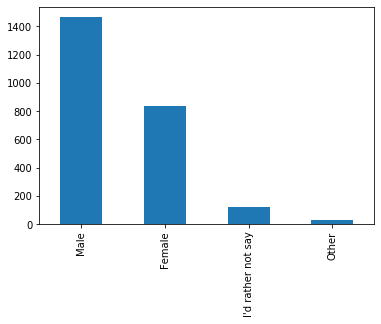

In [60]:
#discovering which gender shared at that data more
df.q2_gender.value_counts().plot(kind = 'bar')
df.q2_gender.value_counts()